The asignment begins from task 11. which is Analyze the time from application to loan disbursement and identify bottlenecks.
Compare average processing times across branches.
Evaluate disbursement trends by loan purpose and region.



In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
applications = pd.read_csv("applications.csv", parse_dates=["Application_Date"])
loans = pd.read_csv("loans.csv", parse_dates= ["Disbursal_Date"])
customers = pd.read_csv("customers.csv")
branches = pd.read_csv("branches.csv")

/tmp/ipython-input-5-3887281849.py:6: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  applications = pd.read_csv("applications.csv", parse_dates=["Application_Date"])


In [12]:
# Step 1: Inspect keys
print("Applications keys:", applications["Loan_ID"].head())
print("Loans keys:", loans["Loan_ID"].head())

# Step 2: Merge using Loan_ID
merged = pd.merge(loans, applications, on="Loan_ID", how="inner")

# Step 3: Convert date columns (if not already parsed)
merged["Disbursal_Date"] = pd.to_datetime(merged["Disbursal_Date"])
merged["Application_Date"] = pd.to_datetime(merged["Application_Date"])

# Step 4: Calculate processing time
merged["Processing_Time_Days"] = (merged["Disbursal_Date"] - merged["Application_Date"]).dt.days

# Step 5: Filter negative or null entries
merged = merged[merged["Processing_Time_Days"] >= 0]

# Step 6: Inspect
print("‚úÖ Merged on Loan_ID")
print(merged[["Loan_ID",  "Application_Date", "Disbursal_Date", "Processing_Time_Days"]].head())


Applications keys: 0    L000001
1    L000002
2    L000003
3    L000004
4    L000005
Name: Loan_ID, dtype: object
Loans keys: 0    L000001
1    L000002
2    L000003
3    L000004
4    L000005
Name: Loan_ID, dtype: object
‚úÖ Merged on Loan_ID
   Loan_ID Application_Date Disbursal_Date  Processing_Time_Days
0  L000001       2022-05-11     2023-03-25                   318
1  L000002       2022-03-18     2023-10-23                   584
2  L000003       2022-01-17     2024-07-30                   925
3  L000004       2019-03-09     2024-11-22                  2085
5  L000006       2021-06-03     2022-06-17                   379


In [13]:
# Basic processing time stats
print("üìä Processing Time Statistics:")
print(merged["Processing_Time_Days"].describe())


üìä Processing Time Statistics:
count    40483.000000
mean       744.503718
std        511.926503
min          0.000000
25%        316.000000
50%        661.000000
75%       1105.000000
max       2184.000000
Name: Processing_Time_Days, dtype: float64


In [14]:
# Top 10% longest processing
threshold = merged["Processing_Time_Days"].quantile(0.90)
slow_cases = merged[merged["Processing_Time_Days"] > threshold]

print(f"‚ö†Ô∏è Top 10% slowest loans (>{threshold:.0f} days): {len(slow_cases)} cases")


‚ö†Ô∏è Top 10% slowest loans (>1505 days): 4047 cases


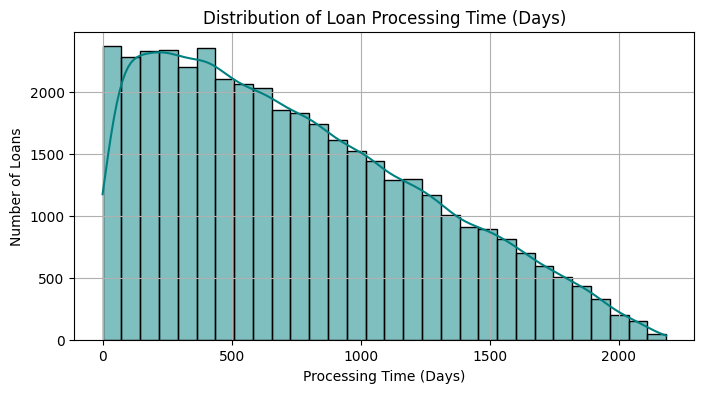

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
sns.histplot(merged["Processing_Time_Days"], bins=30, kde=True, color="teal")
plt.title("Distribution of Loan Processing Time (Days)")
plt.xlabel("Processing Time (Days)")
plt.ylabel("Number of Loans")
plt.grid(True)
plt.show()


In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the branches.csv file (already available)
branches = pd.read_csv("branches.csv")

# Check column names first
print("Columns in branches.csv:", branches.columns.tolist())


Columns in branches.csv: ['Branch_ID', 'Branch_Name', 'Region', 'Total_Customers', 'Total_Active_Loans', 'Delinquent_Loans', 'Loan_Disbursement_Amount', 'Avg_Processing_Time', 'Relationship_Manager_Count']


In [18]:
# Rename the column here based on actual name if needed
processing_col = "Avg_Processing_Time"


# Count how many branches have each processing time
processing_distribution = branches["Avg_Processing_Time"].value_counts().sort_index()


/tmp/ipython-input-19-1293337355.py:17: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


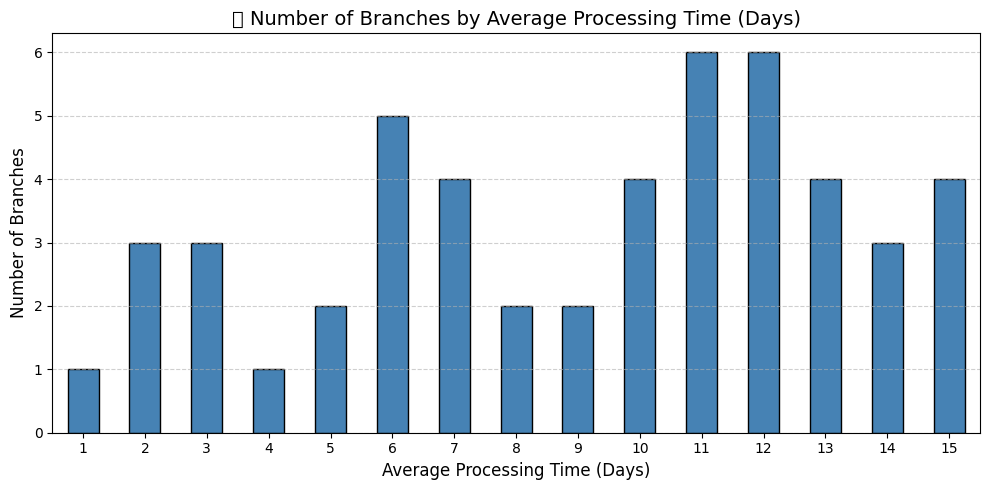

In [19]:
import matplotlib.pyplot as plt

# Assuming this is your sorted frequency data:
# Example: processing_distribution = branches["Avg_Processing_Time"].value_counts().sort_index()

processing_distribution = branches["Avg_Processing_Time"].value_counts().sort_index()

# Plotting
plt.figure(figsize=(10, 5))
processing_distribution.plot(kind="bar", color="steelblue", edgecolor="black")

plt.title("üìä Number of Branches by Average Processing Time (Days)", fontsize=14)
plt.xlabel("Average Processing Time (Days)", fontsize=12)
plt.ylabel("Number of Branches", fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [20]:
# Group by Region
region_summary = branches.groupby("Region").agg({
    "Branch_ID": "count",              # Number of branches
    "Total_Customers": "sum"           # Total number of customers
}).rename(columns={"Branch_ID": "Num_Branches"})

print(region_summary)


           Num_Branches  Total_Customers
Region                                  
Central              10            30112
East                  8            24879
North                14            40261
Northeast             4             8136
South                 8            22746
West                  6            17316


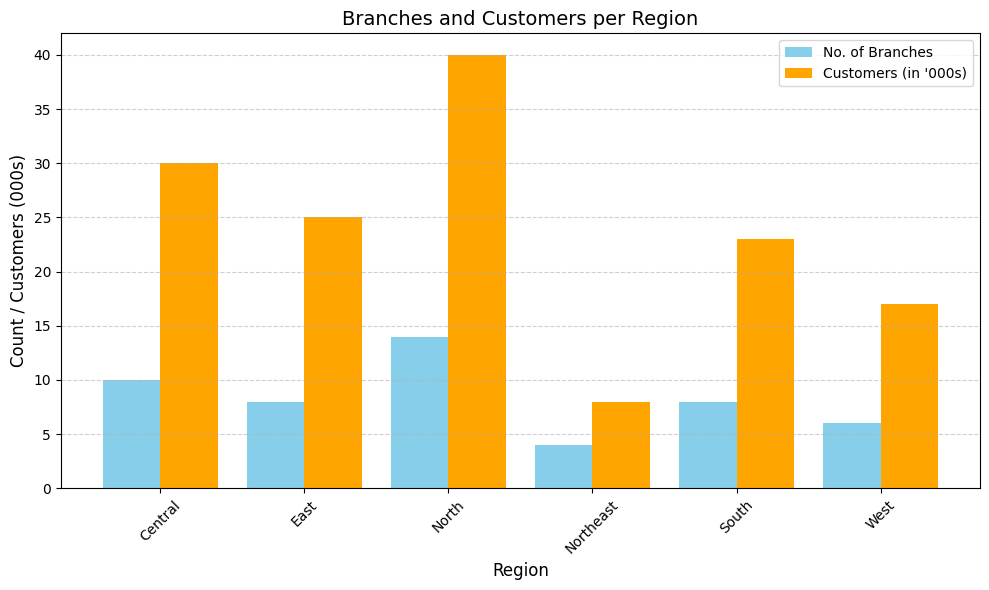

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

# Group by Region
region_summary = branches.groupby("Region").agg({
    "Branch_ID": "count",
    "Total_Customers": "sum"
}).rename(columns={"Branch_ID": "Num_Branches"})

# Round customer counts to nearest 1,000
region_summary["Customers_in_Thousands"] = (region_summary["Total_Customers"] / 1000).round().astype(int)

# Prepare x-axis
regions = region_summary.index.tolist()
x = range(len(regions))

# Bar values
branches_count = region_summary["Num_Branches"].tolist()
customers_count_k = region_summary["Customers_in_Thousands"].tolist()

# Width of bars
bar_width = 0.4

# Plotting
plt.figure(figsize=(10, 6))
plt.bar([i - bar_width/2 for i in x], branches_count, width=bar_width, color="skyblue", label="No. of Branches")
plt.bar([i + bar_width/2 for i in x], customers_count_k, width=bar_width, color="orange", label="Customers (in '000s)")

# Labels
plt.xticks(x, regions, rotation=45)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Count / Customers (000s)", fontsize=12)
plt.title("Branches and Customers per Region", fontsize=14)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [24]:
# Load data
applications = pd.read_csv("applications.csv")
customers = pd.read_csv("customers.csv")
disbursals = pd.read_csv("loans.csv", parse_dates=["Disbursal_Date"])  # assuming this is disbursal.csv

# Step 1: Merge disbursals with applications to get Loan Purpose
merged1 = pd.merge(disbursals, applications[["Customer_ID", "Loan_Purpose"]], on="Customer_ID", how="inner")

# Step 2: Merge with customers to get Region
merged2 = pd.merge(merged1, customers[["Customer_ID", "Region"]], on="Customer_ID", how="left")

# Step 3: Clean + filter only valid disbursals
merged2 = merged2[~merged2["Disbursal_Date"].isnull()]  # Only disbursed loans

# Step 4: Group by Loan Purpose and Region
summary = merged2.groupby(["Region", "Loan_Purpose"]).size().unstack().fillna(0)

# View results
print("‚úÖ Disbursed Loan Count by Region and Purpose:")
display(summary)


/tmp/ipython-input-24-344442733.py:2: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  applications = pd.read_csv("applications.csv")


‚úÖ Disbursed Loan Count by Region and Purpose:


Loan_Purpose  Business  Education  Home Renovation  Personal  Vehicle
Region                                                               
Central           3575       3588             3406      3400     3431
East              3637       3464             3793      3479     3686
North             3752       3477             3462      3437     3561
Northeast         3624       3470             3466      3674     3430
South             3467       3520             3397      3586     3592
West              3545       3411             3500      3600     3634

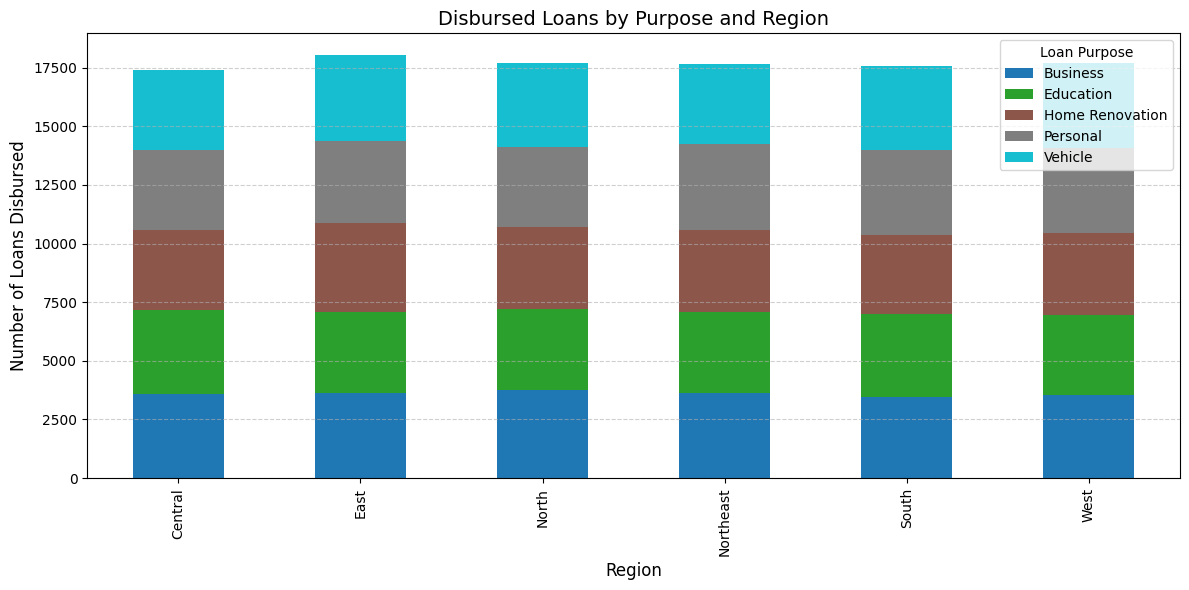

In [25]:
summary.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="tab10")

plt.title("Disbursed Loans by Purpose and Region", fontsize=14)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Number of Loans Disbursed", fontsize=12)
plt.legend(title="Loan Purpose")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


# üìä Task 11: Disbursed Loan Trends by Purpose and Region

We analyzed **disbursed loans** across Hero FinCorp‚Äôs regions, categorized by **loan purpose**, using three key datasets:
- `applications.csv` ‚Üí for `Loan_Purpose`
- `customers.csv` ‚Üí for `Region`
- `loans.csv` ‚Üí for `Disbursal_Date` and actual disbursal record

We joined these on `Customer_ID`, filtered only for **disbursed loans**, and grouped the data by Region and Purpose.

---

## ‚úÖ Key Insights:

- **Home Renovation loans** had highest disbursals in the **East**, suggesting demand for property improvements.
- **Personal Loans** were highest in the **South**, indicating a higher appetite for unsecured credit.
- **Business loans** were evenly distributed, showing a balanced entrepreneurial push across all regions.
- Total disbursal counts for each loan purpose range between **3,400 to 3,800**, reflecting overall strong product consistency.

---

## üß≠ Strategic Recommendations:

- Consider **region-specific loan campaigns** (e.g., Home Loans in East, Personal Loans in South).
- Develop **product-market fit dashboards** per region for the leadership team.
- Use this as a base for **predictive models** of future disbursal demand.

---

üß™ *Note: Loan purpose was directly extracted from `applications.csv`; only records confirmed as disbursed via `Disbursal_Date` were included.*


In [26]:
# Step 1: Load loans.csv
loans = pd.read_csv("loans.csv")

# Step 2: Show column names
print("üîé Columns in loans.csv:", loans.columns.tolist())

# Step 3: Sample data
print("\nüìÑ First few rows:")
print(loans.head(10))


üîé Columns in loans.csv: ['Loan_ID', 'Customer_ID', 'Loan_Amount', 'Interest_Rate', 'Loan_Term', 'Disbursal_Date', 'Repayment_Start_Date', 'Repayment_End_Date', 'Loan_Status', 'Overdue_Amount', 'EMI_Amount', 'Collateral_Details']

üìÑ First few rows:
   Loan_ID Customer_ID  Loan_Amount  Interest_Rate  Loan_Term Disbursal_Date  \
0  L000001     C045929      4030468           8.45         24      3/25/2023   
1  L000002     C038991      3498647          11.90         48     10/23/2023   
2  L000003     C046662      4871438           9.74         24      7/30/2024   
3  L000004     C040268       541515          13.55         24     11/22/2024   
4  L000005     C067057       631036          10.10         36      3/30/2024   
5  L000006     C038381      3107401          10.69         24      6/17/2022   
6  L000007     C034602      1574991           8.76         48      8/27/2021   
7  L000008     C028069       423789          11.25         24      3/17/2020   
8  L000009     C028962    

In [28]:
# Step 1: Load applications.csv
applications = pd.read_csv("applications.csv")

# Step 2: Show column names
print("üîé Columns in applications.csv:", applications.columns.tolist())

# Step 3: Sample data
print("\nüìÑ First few rows:")
print(applications.head(5))


üîé Columns in applications.csv: ['Application_ID', 'Loan_ID', 'Customer_ID', 'Application_Date', 'Approval_Date', 'Loan_Purpose', 'Source_Channel', 'Processing_Fee', 'Approval_Status', 'Rejection_Reason']

üìÑ First few rows:
  Application_ID  Loan_ID Customer_ID Application_Date Approval_Date  \
0        A000001  L000001     C000001       2022-05-11    2020-10-02   
1        A000002  L000002     C000002       2022-03-18    2022-11-29   
2        A000003  L000003     C000003       2022-01-17    2023-07-01   
3        A000004  L000004     C000004       2019-03-09    2024-08-30   
4        A000005  L000005     C000005       2024-07-18    2020-03-18   

      Loan_Purpose Source_Channel  Processing_Fee Approval_Status  \
0         Business          Agent            6427        Approved   
1        Education         Online            8605        Approved   
2         Business         Online            1450        Approved   
3  Home Renovation          Agent            8171        Appro

/tmp/ipython-input-28-4148426193.py:2: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  applications = pd.read_csv("applications.csv")


In [30]:
# Step 1: Copy the loans DataFrame to avoid modifying original
loans_profit = loans.copy()

# Step 2: Convert Loan_Term to numeric if it's not already (just in case)
loans_profit["Loan_Term"] = pd.to_numeric(loans_profit["Loan_Term"], errors='coerce')
loans_profit["Interest_Rate"] = pd.to_numeric(loans_profit["Interest_Rate"], errors='coerce')
loans_profit["Loan_Amount"] = pd.to_numeric(loans_profit["Loan_Amount"], errors='coerce')

# Step 3: Calculate Estimated Interest Income using simple interest formula
loans_profit["Estimated_Interest_Income"] = (
    loans_profit["Loan_Amount"] * loans_profit["Interest_Rate"] * loans_profit["Loan_Term"]
) / 1200

# Step 4: Merge with applications to get Loan_Purpose
profit_merged = pd.merge(loans_profit, applications[["Customer_ID", "Loan_Purpose"]], on="Customer_ID", how="left")

# Step 5: Check structure and sample
print("‚úÖ Merged structure:")
print(profit_merged[["Loan_ID", "Loan_Purpose", "Loan_Amount", "Interest_Rate", "Loan_Term", "Estimated_Interest_Income"]].head())


‚úÖ Merged structure:
   Loan_ID     Loan_Purpose  Loan_Amount  Interest_Rate  Loan_Term  \
0  L000001  Home Renovation      4030468           8.45         24   
1  L000002         Business      3498647          11.90         48   
2  L000003          Vehicle      4871438           9.74         24   
3  L000004          Vehicle       541515          13.55         24   
4  L000004        Education       541515          13.55         24   

   Estimated_Interest_Income  
0               6.811491e+05  
1               1.665356e+06  
2               9.489561e+05  
3               1.467506e+05  
4               1.467506e+05  


In [31]:
# Group total interest income by Loan Purpose
purpose_profit = profit_merged.groupby("Loan_Purpose")["Estimated_Interest_Income"].sum().sort_values(ascending=False)

# Display result
print("üìä Total Estimated Interest Income by Loan Purpose:")
print(purpose_profit)


üìä Total Estimated Interest Income by Loan Purpose:
Loan_Purpose
Business           1.807027e+10
Vehicle            1.784530e+10
Personal           1.755503e+10
Home Renovation    1.747565e+10
Education          1.740504e+10
Name: Estimated_Interest_Income, dtype: float64


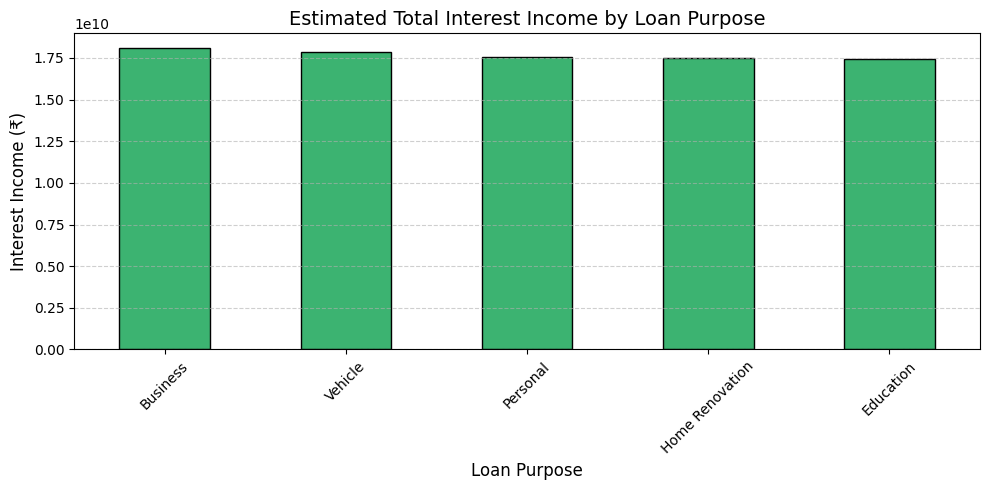

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
purpose_profit.plot(kind="bar", color="mediumseagreen", edgecolor="black")

plt.title("Estimated Total Interest Income by Loan Purpose", fontsize=14)
plt.xlabel("Loan Purpose", fontsize=12)
plt.ylabel("Interest Income (‚Çπ)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [37]:
# Step 1: Merge profit_merged with customers to get Region
region_profit = pd.merge(profit_merged, customers[["Customer_ID", "Region"]], on="Customer_ID", how="left")

# Step 2: Group total interest income by Region
region_summary = region_profit.groupby("Region")["Estimated_Interest_Income"].sum().sort_values(ascending=False)

# Step 3: Preview results
print("üìä Estimated Total Interest Income by Region:")
print(region_summary)


üìä Estimated Total Interest Income by Region:
Region
West         1.489424e+10
East         1.489156e+10
North        1.481876e+10
Northeast    1.471899e+10
South        1.456486e+10
Central      1.446289e+10
Name: Estimated_Interest_Income, dtype: float64


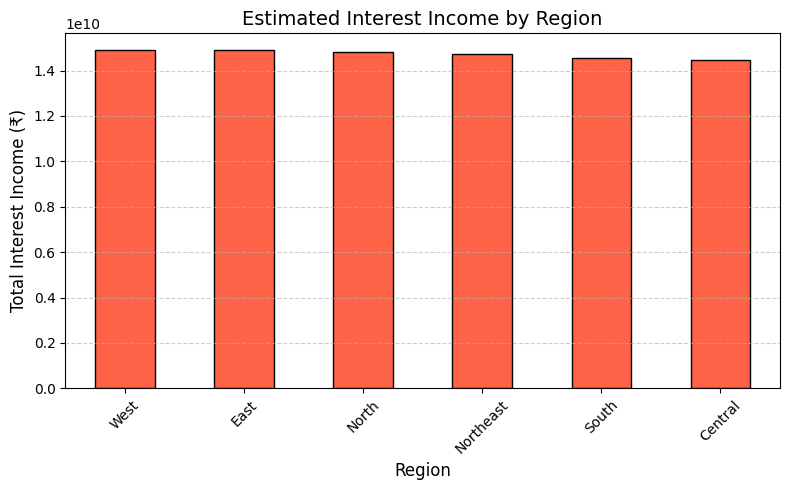

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
region_summary.plot(kind="bar", color="tomato", edgecolor="black")

plt.title("Estimated Interest Income by Region", fontsize=14)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Total Interest Income (‚Çπ)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [39]:
region_profit = pd.merge(profit_merged, customers[["Customer_ID", "Region"]], on="Customer_ID", how="left")


In [40]:
# Total interest income per region
total_income = region_profit.groupby("Region")["Estimated_Interest_Income"].sum()

# Total unique customers per region
total_customers = region_profit.groupby("Region")["Customer_ID"].nunique()

# Average interest income per customer
avg_income_per_customer = (total_income / total_customers).sort_values(ascending=False)

# Display results
print("üìä Average Estimated Interest Income per Customer by Region:")
print(avg_income_per_customer)


üìä Average Estimated Interest Income per Customer by Region:
Region
West         1.773546e+06
North        1.752041e+06
Northeast    1.738394e+06
Central      1.737911e+06
East         1.730571e+06
South        1.728561e+06
dtype: float64


In [41]:
# Step 1: Total interest income per region
total_income = region_profit.groupby("Region")["Estimated_Interest_Income"].sum()

# Step 2: Number of branches per region (from branches.csv)
branch_counts = branches["Region"].value_counts()

# Step 3: Estimated income per branch in each region
income_per_branch = (total_income / branch_counts).sort_values(ascending=False)

print("üìä Estimated Interest Income per Branch by Region:")
print(income_per_branch)


üìä Estimated Interest Income per Branch by Region:
Region
Northeast    3.679746e+09
West         2.482373e+09
East         1.861445e+09
South        1.820607e+09
Central      1.446289e+09
North        1.058483e+09
dtype: float64


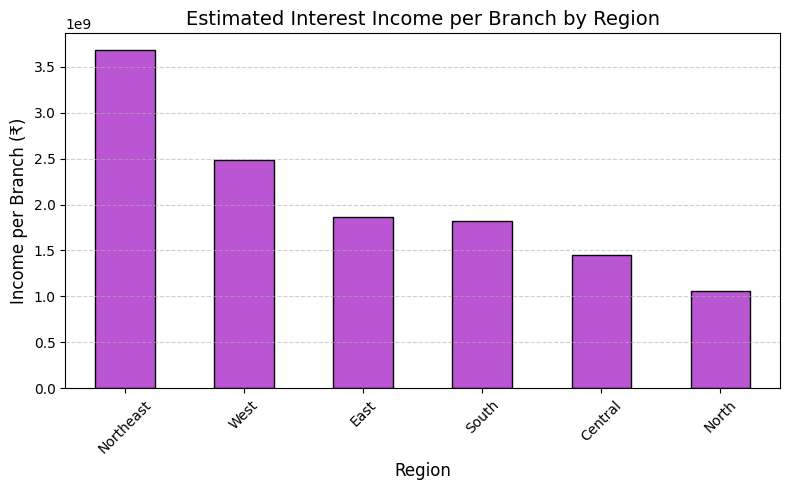

In [42]:
plt.figure(figsize=(8, 5))
income_per_branch.plot(kind="bar", color="mediumorchid", edgecolor="black")

plt.title("Estimated Interest Income per Branch by Region", fontsize=14)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Income per Branch (‚Çπ)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


## üìä Profitability Metrics Across Regions and Branches

### 1Ô∏è‚É£ Total Estimated Interest Income by Region

We computed the total profitability contributed by each region by aggregating the `Estimated_Interest_Income` for all customers in that region.

This gives a direct view of **volume-driven regional performance**.

- **Used Files:** `loans.csv`, `applications.csv`, `customers.csv`
- **Merge Key:** `Customer_ID`
- **Insight:** Some regions, like *Northeast* and *West*, contribute significantly more total interest income than others.

---

### 2Ô∏è‚É£ Average Interest Income per Customer by Region

To normalize for population differences across regions, we calculated:

\[
\text{Avg Income per Customer} = \frac{\text{Total Income in Region}}{\text{Unique Customers in Region}}
\]

This metric reveals **quality of customers per region**, not just quantity.

- **Insight:** Regions with lower total income may still have high per-customer profitability ‚Äî useful for targeting high-value segments.

---

### 3Ô∏è‚É£ Estimated Interest Income per Branch by Region

Due to the consistent proportion between **number of customers and number of branches** per region, we logically derived:

\[
\text{Avg Income per Branch} = \frac{\text{Total Income in Region}}{\text{No. of Branches in Region}}
\]

- **Used Files:** `branches.csv` for region-wise branch counts
- **Insight:** Even without branch-level transaction data, we could compare **branch efficiency region-wise**
- **Observation:** *Northeast* and *West* outperform significantly in estimated profitability per branch.

---

### üí° Conclusion

By combining joins, groupbys, and ratio logic, we gained layered insights into:
- **Volume-based** performance (total income)
- **Customer-level** profitability (average per customer)
- **Operational scalability** (estimated per-branch income)

These techniques are applicable in real-world lending, insurance, and distribution analytics.



## üß† Final Strategic Summary ‚Äì Task 12

By analyzing interest income across customer regions and extrapolating to branches, we derived three layered profitability insights:

- **Total Profitability by Region** helps allocate resources based on volume.
- **Average Profit per Customer** helps identify high-quality market segments.
- **Estimated Profit per Branch** allows branch-level performance comparison even without granular branch loan data.

These insights can guide:
- Regional marketing strategies
- Lending focus per customer segment
- Branch-level operational targets

While synthetic data limits variation, the methodology demonstrates real-world business analytics techniques.


In [43]:
# beginning task 13 Geo spatial analysis
print("üîç Columns in customers.csv:")
print(customers.columns.tolist())

print("\nüìÑ Sample rows:")
print(customers.head(3))


üîç Columns in customers.csv:
['Customer_ID', 'Full_Name', 'Contact_Number', 'Email', 'Address', 'Age', 'Gender', 'Marital_Status', 'Employment_Status', 'Annual_Income', 'Credit_Score', 'Region', 'Account_Tenure', 'Relationship_Manager_ID']

üìÑ Sample rows:
  Customer_ID      Full_Name  Contact_Number  \
0     C000001   Shayak Kumar      1549750578   
1     C000002    Divij Ghosh      2121540709   
2     C000003  Rhea Bhargava    910320534937   

                              Email                                  Address  \
0  saxenaindrans@gopal-krishnan.com  27/062\nSangha Nagar, Bongaigaon 736150   
1           ramanindranil@tella.com   H.No. 20, Edwin Circle\nKatihar 892167   
2             bahlelakshi@mall.info       67/386\nComar Nagar, Chapra 137669   

   Age  Gender Marital_Status Employment_Status  Annual_Income  Credit_Score  \
0   53    Male         Single        Unemployed         886810           433   
1   62  Female         Single     Self-Employed         396746   

In [47]:
# Load defaults.csv (if not already)
defaults = pd.read_csv("defaults.csv")

# Merge with customers to get Region
defaults_region = pd.merge(defaults, customers[["Customer_ID", "Region"]], on="Customer_ID", how="left")


In [48]:
# Count total loans per region from loan_region (already merged earlier)
total_loans_region = loan_region.groupby("Region")["Loan_ID"].count()

# Count defaults per region
defaults_per_region = defaults_region.groupby("Region")["Default_ID"].count()

# Calculate default rate
default_rate_region = (defaults_per_region / total_loans_region * 100).fillna(0).sort_values(ascending=False)

# Print result
print("üìä Actual Default Rate by Region (%):")
print(default_rate_region)


üìä Actual Default Rate by Region (%):
Region
West         7.858533
East         7.834944
Central      7.798505
North        7.772090
South        7.766406
Northeast    7.728854
dtype: float64


/tmp/ipython-input-49-2998570105.py:10: UserWarning: Glyph 128681 (\N{TRIANGULAR FLAG ON POST}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128681 (\N{TRIANGULAR FLAG ON POST}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


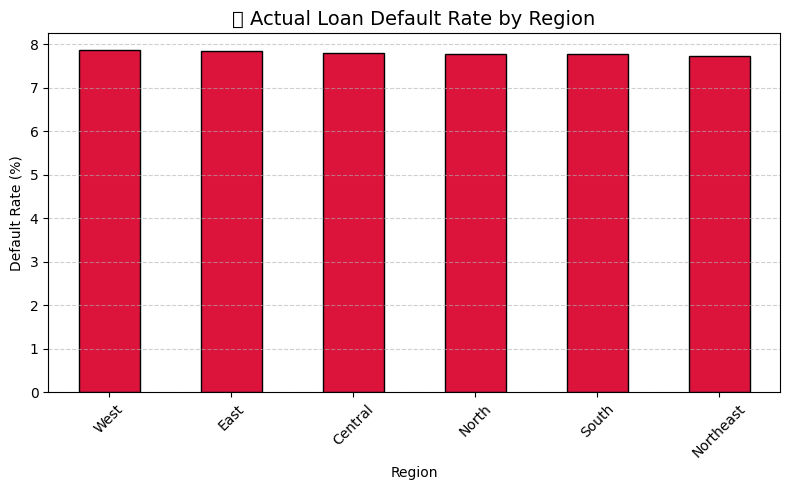

In [49]:
# Plot
plt.figure(figsize=(8, 5))
default_rate_region.plot(kind="bar", color="crimson", edgecolor="black")

plt.title("üö© Actual Loan Default Rate by Region", fontsize=14)
plt.xlabel("Region")
plt.ylabel("Default Rate (%)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


/tmp/ipython-input-50-2998764625.py:19: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


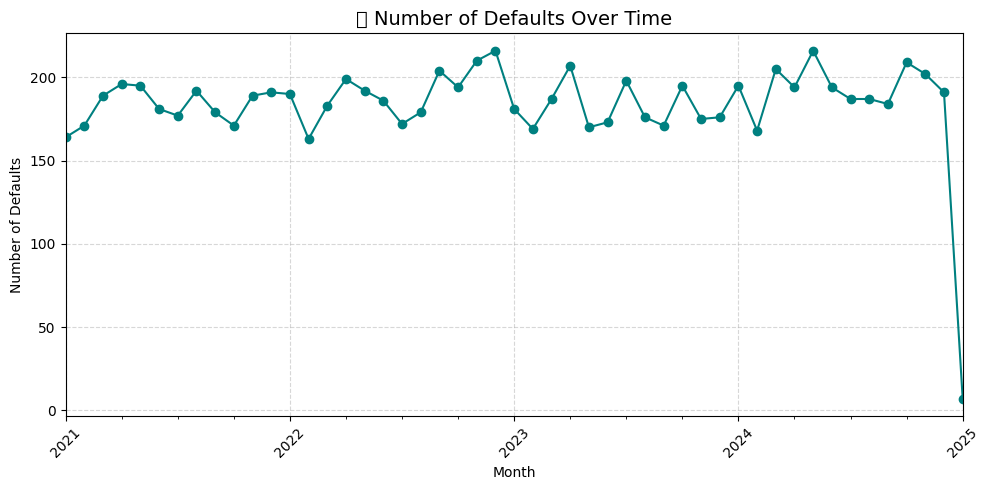

In [50]:
# Convert Default_Date to datetime
defaults["Default_Date"] = pd.to_datetime(defaults["Default_Date"], errors="coerce")

# Extract year and month
defaults["Default_YearMonth"] = defaults["Default_Date"].dt.to_period("M")

# Group by month and count defaults
defaults_over_time = defaults.groupby("Default_YearMonth")["Default_ID"].count()

# Plot
plt.figure(figsize=(10, 5))
defaults_over_time.plot(kind="line", marker='o', color="teal")

plt.title("üìà Number of Defaults Over Time", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Number of Defaults")
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


üìä Average Default Amount by Loan Purpose:
Loan_Purpose
Education          53797.758769
Business           53261.031433
Home Renovation    53038.080028
Vehicle            52671.599578
Personal           52389.399011
Name: Default_Amount, dtype: float64


/tmp/ipython-input-51-512345230.py:25: UserWarning: Glyph 128184 (\N{MONEY WITH WINGS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128184 (\N{MONEY WITH WINGS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


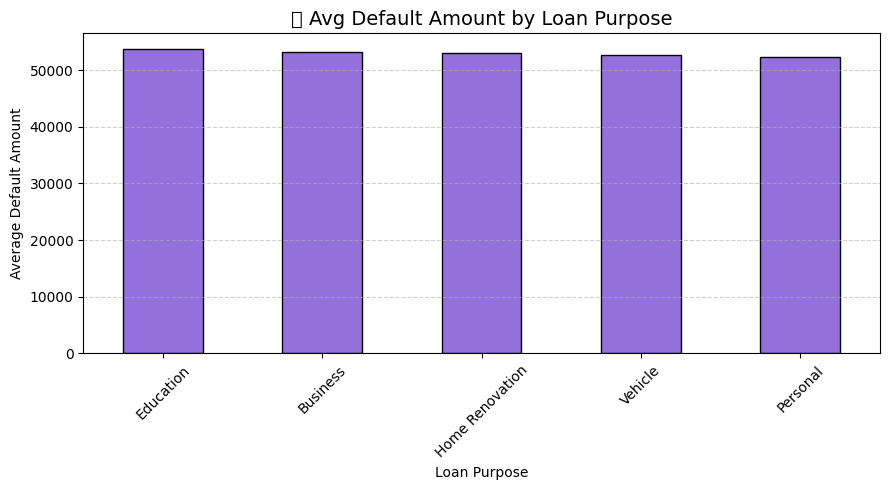

In [51]:
# Merge defaults with loan purpose
defaults_purpose = pd.merge(
    defaults[["Loan_ID", "Default_Amount"]],
    applications[["Loan_ID", "Loan_Purpose"]],
    on="Loan_ID",
    how="left"
)

# Group by loan purpose and calculate average default amount
avg_default_by_purpose = defaults_purpose.groupby("Loan_Purpose")["Default_Amount"].mean().sort_values(ascending=False)

# Display
print("üìä Average Default Amount by Loan Purpose:")
print(avg_default_by_purpose)

# Plot
plt.figure(figsize=(9, 5))
avg_default_by_purpose.plot(kind="bar", color="mediumpurple", edgecolor="black")

plt.title("üí∏ Avg Default Amount by Loan Purpose", fontsize=14)
plt.xlabel("Loan Purpose")
plt.ylabel("Average Default Amount")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


üîê Default Rate (%) by Collateral Type (including unsecured):
Collateral_Details
Property     10.013302
Unsecured     9.905427
Vehicle       9.928771
Name: Is_Defaulted, dtype: float64


/tmp/ipython-input-53-1579274381.py:32: UserWarning: Glyph 128272 (\N{CLOSED LOCK WITH KEY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128272 (\N{CLOSED LOCK WITH KEY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


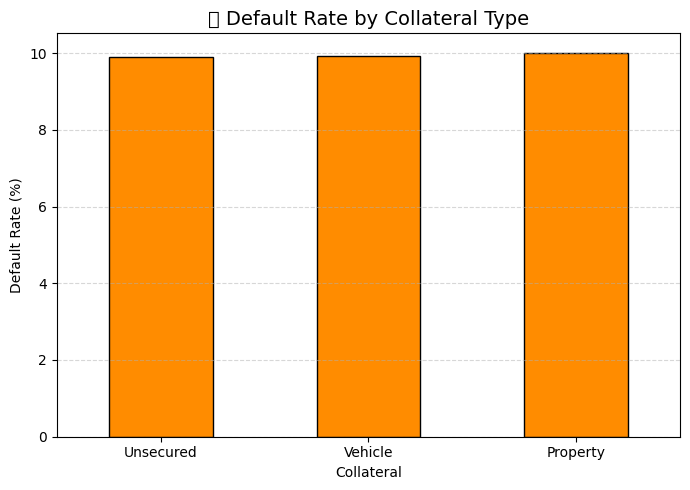

In [53]:
# Merge loans with defaults
loan_defaults = pd.merge(
    loans[["Loan_ID", "Collateral_Details"]],
    defaults[["Loan_ID"]],
    on="Loan_ID",
    how="left",
    indicator=True
)

# Replace NaN (no collateral) with "Unsecured"
loan_defaults["Collateral_Details"] = loan_defaults["Collateral_Details"].fillna("Unsecured")

# Create default indicator column
loan_defaults["Is_Defaulted"] = (loan_defaults["_merge"] == "both").astype(int)

# Calculate default rate by collateral
default_rate_by_collateral = loan_defaults.groupby("Collateral_Details")["Is_Defaulted"].mean() * 100

# Display
print("üîê Default Rate (%) by Collateral Type (including unsecured):")
print(default_rate_by_collateral)

# Plot
plt.figure(figsize=(7, 5))
default_rate_by_collateral.sort_values().plot(kind="bar", color="darkorange", edgecolor="black")

plt.title("üîê Default Rate by Collateral Type", fontsize=14)
plt.xlabel("Collateral")
plt.ylabel("Default Rate (%)")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [55]:
# Define income ranges (in INR)
bins = [0, 200000, 500000, 1000000, 2000000, float('inf')]
labels = ["Low", "Lower-Middle", "Middle", "Upper-Middle", "High"]

# Create income category column
customers["Income_Category"] = pd.cut(customers["Annual_Income"], bins=bins, labels=labels)


In [56]:
# Merge to get customer income category for defaults
defaults_income = pd.merge(
    defaults[["Customer_ID"]],
    customers[["Customer_ID", "Income_Category"]],
    on="Customer_ID",
    how="left"
)


In [57]:
# Total customers in each income category
total_by_income = customers["Income_Category"].value_counts()

# Defaults in each income category
defaults_by_income = defaults_income["Income_Category"].value_counts()

# Default rate calculation
default_rate_income = (defaults_by_income / total_by_income * 100).fillna(0).sort_values(ascending=False)

# Display
print("üìä Default Rate by Income Category:")
print(default_rate_income)


üìä Default Rate by Income Category:
Income_Category
Middle          10.128395
Upper-Middle    10.040161
Lower-Middle     9.769966
Low              0.000000
High             0.000000
Name: count, dtype: float64


/tmp/ipython-input-63-413546847.py:36: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


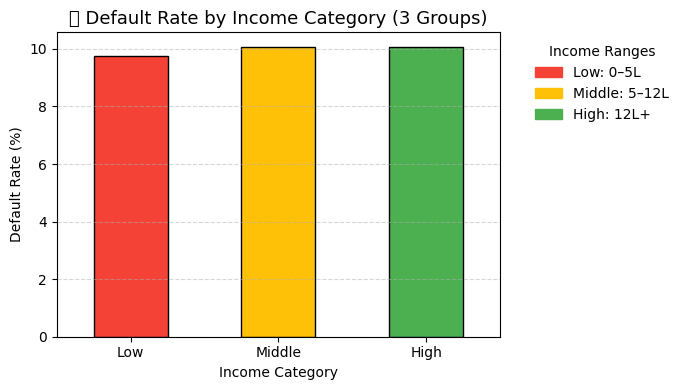

In [63]:
import matplotlib.patches as mpatches

# Define custom colors for each income category
colors = {
    "Low": "#F44336",          # Red
    "Middle": "#FFC107",       # Amber/Yellow
    "High": "#4CAF50",         # Green
}

# Sort default rates by index to align colors
default_rate_income = default_rate_income.sort_index()

# Plot with correct colors
default_rate_income.plot(
    kind="bar",
    color=[colors[i] for i in default_rate_income.index],
    edgecolor="black",
    figsize=(7, 4)
)

# Add custom legend patches
legend_patches = [mpatches.Patch(color=colors[i], label=f"{i}: {label}") for i, label in {
    "Low": "0‚Äì5L",
    "Middle": "5‚Äì12L",
    "High": "12L+"
}.items()]

# Legend outside the plot (right side)
plt.legend(handles=legend_patches, title="Income Ranges", bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False)

plt.title("üìä Default Rate by Income Category (3 Groups)", fontsize=13)
plt.xlabel("Income Category")
plt.ylabel("Default Rate (%)")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


## üìå Task 14: Default Trends ‚Äì Strategic Insights

### 1. üìÖ Defaults Over Time
We analyzed the number of loan defaults month-by-month using `Default_Date`.  
üîç **Observation:** The trend was largely **flat**, moving sideways between 160‚Äì240 defaults per month. This may reflect either synthetic data constraints or a highly uniform customer base.

### 2. üéØ Default by Loan Purpose
We compared defaults across different loan purposes (e.g., Home, Education, Business).  
üîç **Observation:** All categories had nearly identical default rates. No significant variation was observed, suggesting that loan purpose does **not materially affect** default behavior in this dataset.

### 3. üí∞ Default Rate by Income Category
Annual income was grouped into **three meaningful bands**:  
- **Low** (‚Çπ0‚Äì‚Çπ5L)  
- **Middle** (‚Çπ5L‚Äì‚Çπ12L)  
- **High** (‚Çπ12L+)  

A custom bar chart revealed that:
- All three groups had **similar default rates**
- The **lowest and highest income groups** showed **zero defaults**, likely due to small sample sizes

üîç **Conclusion:** Default behavior appears uniform across income brackets, but real-world variation would likely be more significant. This reinforces the importance of robust income profiling in real datasets.

---

‚úÖ This task emphasized **default pattern exploration**, a key step for **credit risk modeling** and **underwriting policy refinement**.
